In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def collate_data(pickle_files):
    all_data = np.zeros((10000*len(pickle_files), 32, 32, 3), dtype = np.float32)
    all_labels = np.zeros((10000*len(pickle_files), 10), dtype = np.float32)

    for i, pickle_file in enumerate(pickle_files):
        dict = pickle.load(open(pickle_file, 'rb'), encoding='latin1')
        for j, row in enumerate(dict['data']):
            all_data[10000*i + j] = row.reshape((32, 32, 3), order = 'F')/255
        labels_ = dict['labels']
        labels = np.zeros((10000, 10), dtype = np.float32)
        for k in range(10000):
            labels[k, labels_[k]] = 1.0
        all_labels[i*10000:(i+1)*10000, :] = labels
    return all_data, all_labels

In [3]:
train_files = ['cifar-10-batches-py/data_batch_%s' %i for i in range(1, 6)]
test_files = ['cifar-10-batches-py/test_batch']
train_X, train_Y = collate_data(train_files)
test_X, test_Y = collate_data(test_files)
label_names = pickle.load(open('cifar-10-batches-py/batches.meta', 'rb'), encoding='latin1')['label_names']

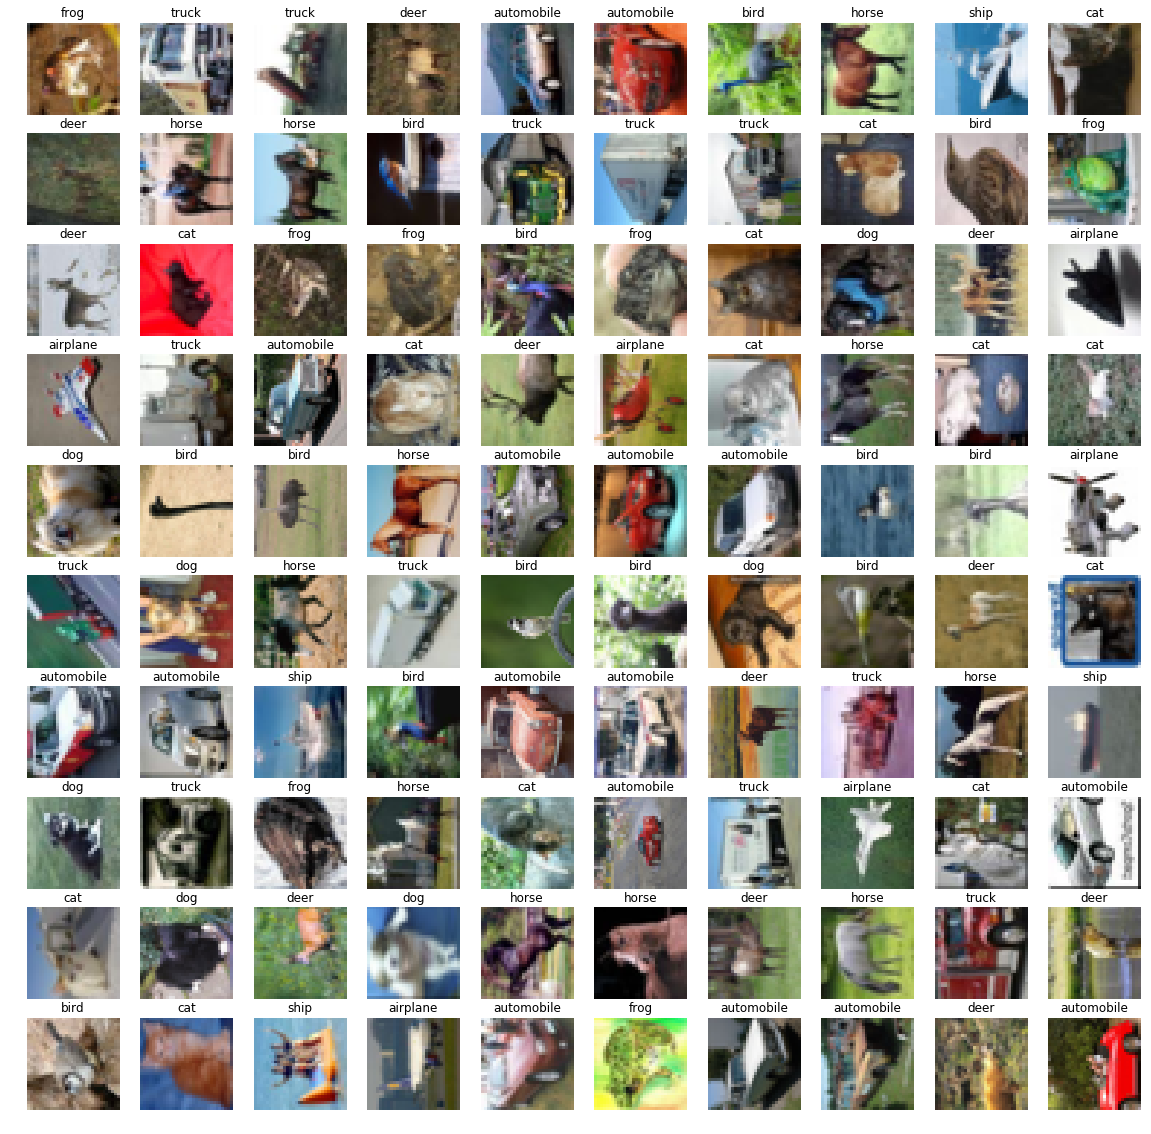

In [4]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.imshow(train_X[i])
    plt.title(label_names[np.argmax(train_Y[i])])

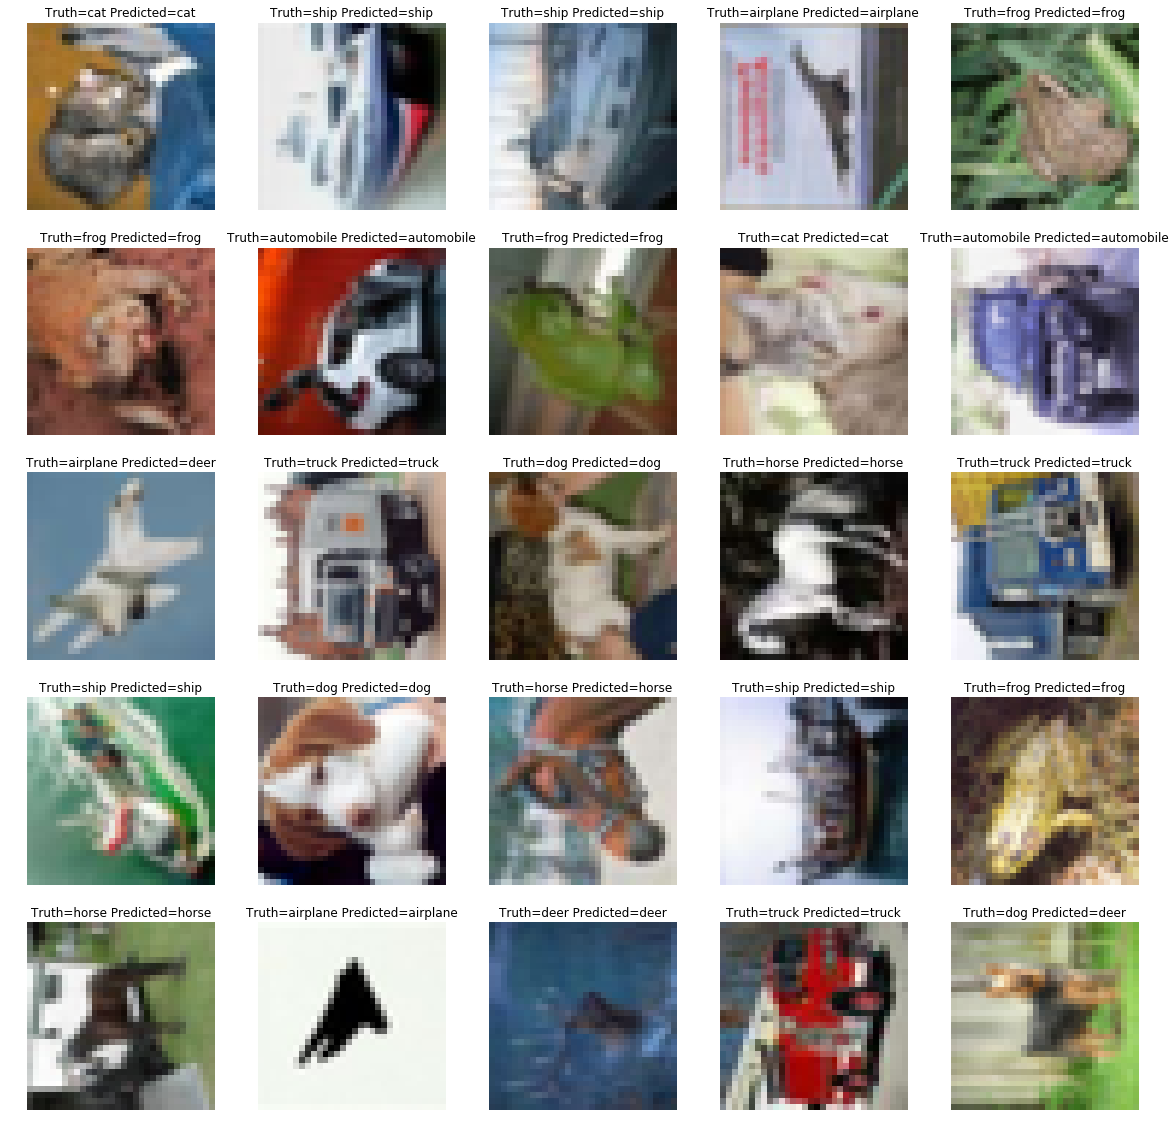

In [5]:
mymodel = tf.keras.models.load_model('myCNN_trained.h5')
preds = (mymodel.predict_classes(test_X[:25]))
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(test_X[i])
    plt.title('Truth=%s Predicted=%s' %(label_names[np.argmax(test_Y[i])], label_names[preds[i]]))

Text(0.5,1,'Pred=horse')

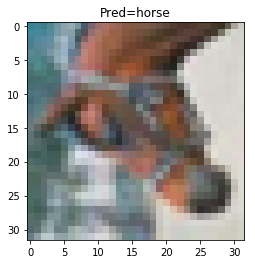

In [6]:
horse = test_X[17]
horse_copy = horse.copy()
plt.imshow(horse)
plt.title('Pred=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(horse, axis = 0)))])

In [7]:
def create_fake_(i):
    print('Creating fake %s' %label_names[i])
    horse_ = horse_copy.copy()
    horse_ = np.expand_dims(horse_, axis = 0)
    min_perturbed = np.clip(horse_-0.01, 0, 1)
    max_perturbed = np.clip(horse_+0.01, 0, 1)
    input_layer = mymodel.layers[0].input
    output_layer = mymodel.layers[-1].output
    cost_fn = output_layer[0, i] #Prob that the current image is classified as class i
    grad_fn = tf.keras.backend.gradients(cost_fn, input_layer)[0]
    get_cost_and_grads = tf.keras.backend.function(inputs = [input_layer, tf.keras.backend.learning_phase()], outputs = [cost_fn, grad_fn])
    lr = 0.1
    cost = 0.0
    while cost<0.8:
        cost, grads = get_cost_and_grads([horse_, 0])
        print('Cost = %s' %cost)
        horse_+=lr*grads
        np.clip(horse_, min_perturbed, max_perturbed)
    return horse_[0]

In [8]:
fake_labels = list(range(10))
fake_labels.remove(7)
fakes =[]
for label in fake_labels:
    fakes.append(create_fake_(label))

Creating fake airplane
Cost = 0.0025648577
Cost = 0.0033753577
Cost = 0.0046957806
Cost = 0.006809362
Cost = 0.010255542
Cost = 0.016318852
Cost = 0.027846163
Cost = 0.049178142
Cost = 0.069187984
Cost = 0.08125822
Cost = 0.089524165
Cost = 0.097944215
Cost = 0.108257666
Cost = 0.122840576
Cost = 0.15145837
Cost = 0.20990123
Cost = 0.3520641
Cost = 0.7164509
Cost = 0.95821106
Creating fake automobile
Cost = 0.00015185327
Cost = 0.0001557834
Cost = 0.00015992296
Cost = 0.00016432164
Cost = 0.0001689575
Cost = 0.000173873
Cost = 0.00017913616
Cost = 0.00018466607
Cost = 0.0001905315
Cost = 0.0001967244
Cost = 0.00020320714
Cost = 0.00021020921
Cost = 0.0002176446
Cost = 0.000225427
Cost = 0.00023364818
Cost = 0.0002421536
Cost = 0.00025104667
Cost = 0.00026054503
Cost = 0.00027053113
Cost = 0.0002812633
Cost = 0.00029280802
Cost = 0.00030512814
Cost = 0.00031843927
Cost = 0.00033300824
Cost = 0.00034861884
Cost = 0.00036563215
Cost = 0.0003844266
Cost = 0.0004054715
Cost = 0.0004290542
C

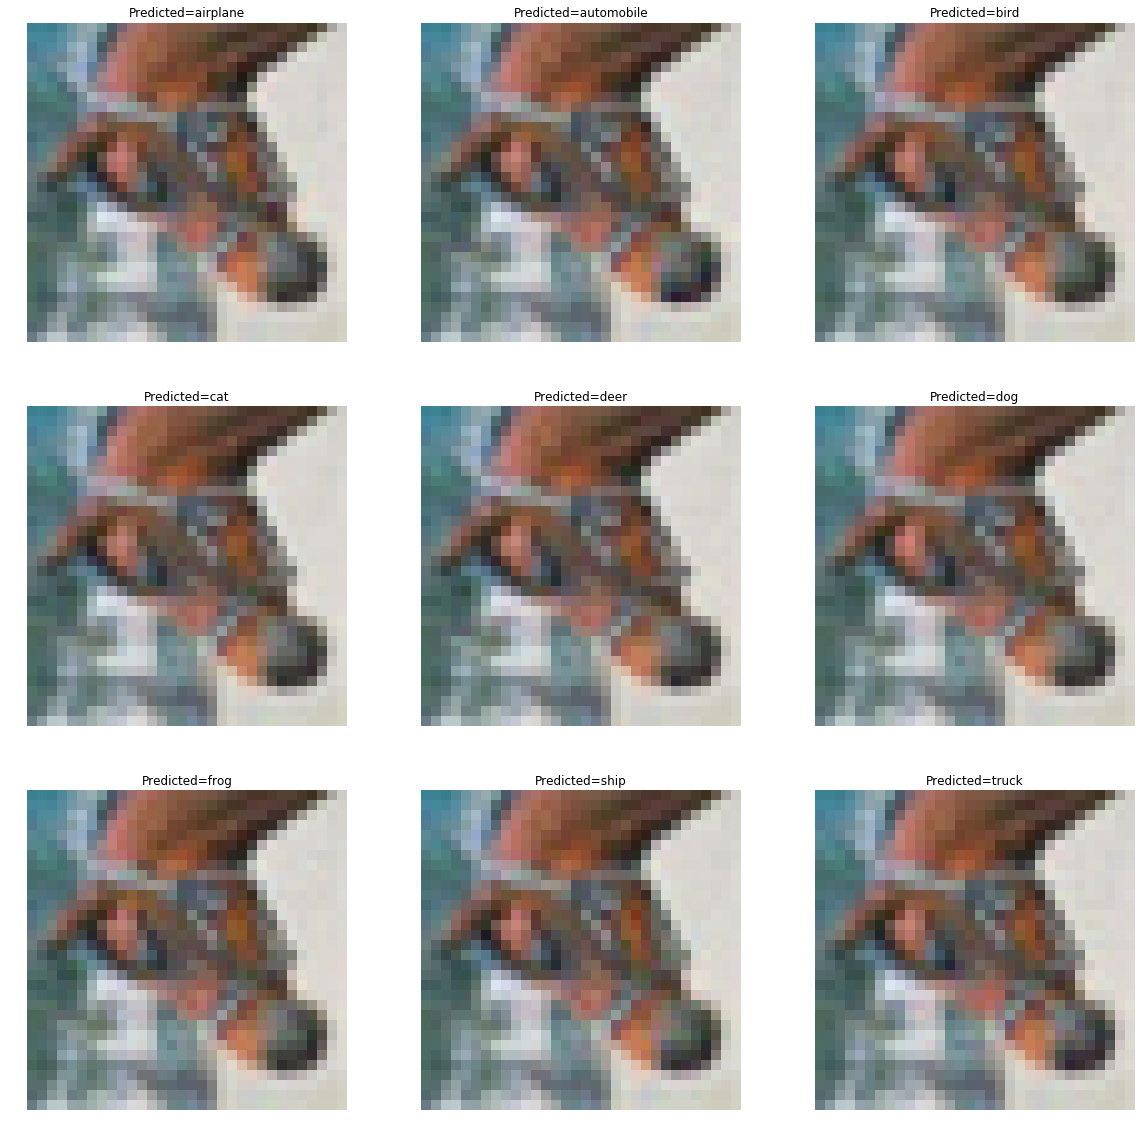

In [9]:
plt.figure(figsize=(20, 20))
for i,fake in enumerate(fakes):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(fake)
    plt.title('Predicted=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(fake, axis = 0)))])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


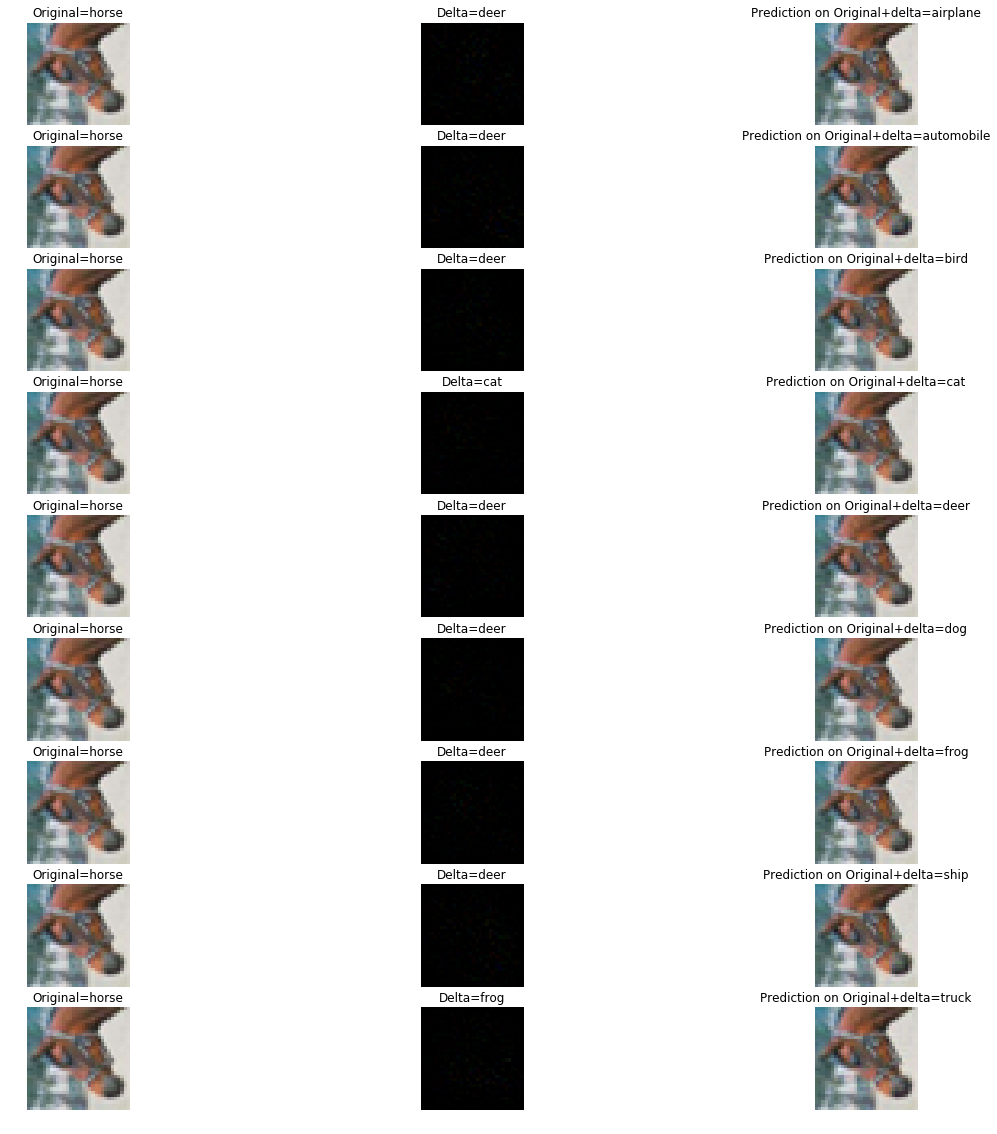

In [10]:
plt.figure(figsize=(20, 20))
for i,fake in enumerate(fakes):
    plt.subplot(9, 3, 3*i+1)
    plt.axis('off')
    plt.imshow(horse)
    plt.title('Original=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(horse, axis = 0)))])
    
    plt.subplot(9, 3, 3*i+2)
    plt.axis('off')
    plt.imshow(fake-horse)
    plt.title('Delta=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(fake-horse, axis = 0)))])
    
    plt.subplot(9, 3, 3*i+3)
    plt.axis('off')
    plt.imshow(fake)
    plt.title('Prediction on Original+delta=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(fake, axis = 0)))])

In [11]:
def create_min_fake_():
    print('Creating Minimum  Delta fake')
    horse_ = horse_copy.copy()
    horse_ = np.expand_dims(horse_, axis = 0)
    min_perturbed = np.clip(horse_-0.01, 0, 1)
    max_perturbed = np.clip(horse_+0.01, 0, 1)
    input_layer = mymodel.layers[0].input
    output_layer = mymodel.layers[-1].output
    cost_fn = output_layer[0, 7] #Prob that the current image is classified as class Horse
    grad_fn = tf.keras.backend.gradients(cost_fn, input_layer)[0]
    get_cost_and_grads = tf.keras.backend.function(inputs = [input_layer, tf.keras.backend.learning_phase()], outputs = [cost_fn, grad_fn])
    lr = 0.1
    cost = 1.0
    while cost>0.2:
        cost, grads = get_cost_and_grads([horse_, 0])
        print('Cost = %s' %cost)
        horse_-=lr*grads #Notice that we are minimizing the prob of correct class
        np.clip(horse_, min_perturbed, max_perturbed)
    return horse_[0]

In [12]:
min_fake = create_min_fake_()

Creating Minimum  Delta fake
Cost = 0.52968323
Cost = 0.05494451


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Predicted=dog')

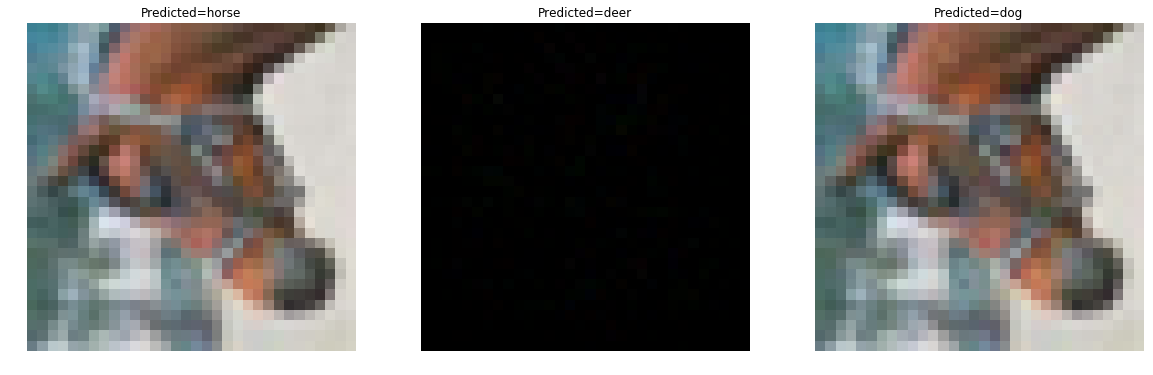

In [13]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(horse)
plt.title('Predicted=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(horse, axis = 0)))])

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(min_fake-horse)
plt.title('Predicted=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(min_fake-horse, axis = 0)))])

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(min_fake)
plt.title('Predicted=%s' %label_names[int(mymodel.predict_classes(np.expand_dims(min_fake, axis = 0)))])

In [14]:
print("L2 Norm of Delta for Min Delta Untargeted attack= %s" %np.linalg.norm(min_fake - horse))
for i, fake in enumerate(fakes):
    print("L2 Norm of Delta for targeted attack with %s taraget = %s" %(label_names[int(mymodel.predict_classes(np.expand_dims(fake, axis = 0)))], np.linalg.norm(fake - horse)))


L2 Norm of Delta for Min Delta Untargeted attack= 0.44490275
L2 Norm of Delta for targeted attack with airplane taraget = 0.80187607
L2 Norm of Delta for targeted attack with automobile taraget = 0.7861163
L2 Norm of Delta for targeted attack with bird taraget = 0.5778892
L2 Norm of Delta for targeted attack with cat taraget = 0.5414484
L2 Norm of Delta for targeted attack with deer taraget = 0.6374064
L2 Norm of Delta for targeted attack with dog taraget = 0.46613154
L2 Norm of Delta for targeted attack with frog taraget = 0.63019115
L2 Norm of Delta for targeted attack with ship taraget = 0.78634983
L2 Norm of Delta for targeted attack with truck taraget = 0.7191308


In [56]:
#1 pixle attack
def one_pixle_attack_():
    horse_ = horse_copy.copy()
    horse_ = np.expand_dims(horse_, axis = 0)
    input_layer = mymodel.layers[0].input
    output_layer = mymodel.layers[-1].output
    cost_fn = output_layer[0, 7]
    grad_fn = tf.keras.backend.gradients(cost_fn, input_layer)[0]
    get_cost_and_grads = tf.keras.backend.function(inputs = [input_layer, tf.keras.backend.learning_phase()], outputs = [cost_fn, grad_fn])
    lr = 0.001
    cost = 1.0
    cost, grads = get_cost_and_grads([horse_, 0])
    max_grad_idx = np.unravel_index(np.argmax(grads), grads.shape)
    print(max_grad_idx)
    while cost>0.2:
        cost, grads = get_cost_and_grads([horse_, 0])
        print('Cost = %s' %cost)
        horse_[max_grad_idx]-=lr
    return horse_[0]

In [57]:
attack = one_pixle_attack_()

(0, 6, 20, 1)
Cost = 0.52968323
Cost = 0.5292338
Cost = 0.528786
Cost = 0.5283404
Cost = 0.5278992
Cost = 0.5274595
Cost = 0.5270183
Cost = 0.52657735
Cost = 0.5261501
Cost = 0.52573186
Cost = 0.52531356
Cost = 0.5249054
Cost = 0.5245001
Cost = 0.524094
Cost = 0.5236831
Cost = 0.523238
Cost = 0.52279204
Cost = 0.5223473
Cost = 0.5219018
Cost = 0.52143663
Cost = 0.5209589
Cost = 0.5204843
Cost = 0.5200108
Cost = 0.5195213
Cost = 0.51902926
Cost = 0.518527
Cost = 0.51802605
Cost = 0.5175246
Cost = 0.51702124
Cost = 0.5165185
Cost = 0.516038
Cost = 0.5155605
Cost = 0.51508254
Cost = 0.5146243
Cost = 0.5141688
Cost = 0.5137129
Cost = 0.51325804
Cost = 0.51279974
Cost = 0.5123436
Cost = 0.51189107
Cost = 0.51143426
Cost = 0.51101965
Cost = 0.5106246
Cost = 0.5102293
Cost = 0.50978744
Cost = 0.5093394
Cost = 0.5088891
Cost = 0.50843537
Cost = 0.5079817
Cost = 0.5075283
Cost = 0.5070747
Cost = 0.50662136
Cost = 0.50616753
Cost = 0.50571394
Cost = 0.50526
Cost = 0.504806
Cost = 0.50435233
Cost

Cost = 0.37684953
Cost = 0.37680238
Cost = 0.37675488
Cost = 0.37670735
Cost = 0.37665972
Cost = 0.3766122
Cost = 0.3765608
Cost = 0.37650704
Cost = 0.3764533
Cost = 0.3763989
Cost = 0.37633967
Cost = 0.3762783
Cost = 0.37624463
Cost = 0.37626207
Cost = 0.37627938
Cost = 0.37629712
Cost = 0.37631464
Cost = 0.3763419
Cost = 0.37639034
Cost = 0.3764328
Cost = 0.37647513
Cost = 0.3765174
Cost = 0.3765601
Cost = 0.37660182
Cost = 0.37664396
Cost = 0.37668583
Cost = 0.37672788
Cost = 0.37676993
Cost = 0.37683186
Cost = 0.37689403
Cost = 0.37695614
Cost = 0.37701783
Cost = 0.37708062
Cost = 0.37714258
Cost = 0.37720522
Cost = 0.37726748
Cost = 0.3773305
Cost = 0.37739295
Cost = 0.37745574
Cost = 0.37753576
Cost = 0.37764618
Cost = 0.37775642
Cost = 0.37786648
Cost = 0.37797666
Cost = 0.3780872
Cost = 0.37819755
Cost = 0.3783075
Cost = 0.378418
Cost = 0.378528
Cost = 0.37863848
Cost = 0.37874898
Cost = 0.37885958
Cost = 0.37896946
Cost = 0.37907392
Cost = 0.3791485
Cost = 0.37921798
Cost = 0.

Cost = 0.39704296
Cost = 0.3971459
Cost = 0.39724946
Cost = 0.39735276
Cost = 0.39745593
Cost = 0.39755887
Cost = 0.39765742
Cost = 0.39775348
Cost = 0.39784712
Cost = 0.39794105
Cost = 0.39803478
Cost = 0.39812854
Cost = 0.39821652
Cost = 0.3983035
Cost = 0.39839044
Cost = 0.3984766
Cost = 0.39856303
Cost = 0.3986488
Cost = 0.39873487
Cost = 0.398821
Cost = 0.39890486
Cost = 0.39898667
Cost = 0.39906886
Cost = 0.39915103
Cost = 0.39923388
Cost = 0.3993159
Cost = 0.39939818
Cost = 0.3994778
Cost = 0.39955455
Cost = 0.3996307
Cost = 0.39970845
Cost = 0.3997921
Cost = 0.3998753
Cost = 0.3999594
Cost = 0.40004256
Cost = 0.40012586
Cost = 0.4002095
Cost = 0.40029663
Cost = 0.40039444
Cost = 0.4004921
Cost = 0.40059012
Cost = 0.4006878
Cost = 0.40078545
Cost = 0.40088272
Cost = 0.40098017
Cost = 0.40107718
Cost = 0.40118444
Cost = 0.4012921
Cost = 0.4013999
Cost = 0.40150774
Cost = 0.4016158
Cost = 0.4017237
Cost = 0.40183187
Cost = 0.40193966
Cost = 0.40204743
Cost = 0.4021539
Cost = 0.402

Cost = 0.44553998
Cost = 0.44568107
Cost = 0.44582257
Cost = 0.44596455
Cost = 0.44610602
Cost = 0.44624752
Cost = 0.44638905
Cost = 0.44653127
Cost = 0.44667238
Cost = 0.44681466
Cost = 0.44695595
Cost = 0.4470978
Cost = 0.4472387
Cost = 0.44738021
Cost = 0.44752213
Cost = 0.44766384
Cost = 0.4478055
Cost = 0.4479475
Cost = 0.44808945
Cost = 0.44822997
Cost = 0.44836852
Cost = 0.44850802
Cost = 0.44864714
Cost = 0.44878435
Cost = 0.44891876
Cost = 0.44905317
Cost = 0.44918197
Cost = 0.44930688
Cost = 0.44943157
Cost = 0.449557
Cost = 0.4496821
Cost = 0.44980705
Cost = 0.44993183
Cost = 0.45006344
Cost = 0.45019206
Cost = 0.45032108
Cost = 0.45044953
Cost = 0.45057854
Cost = 0.45070705
Cost = 0.45083594
Cost = 0.45096624
Cost = 0.4510958
Cost = 0.45121604
Cost = 0.4513291
Cost = 0.4514432
Cost = 0.45155677
Cost = 0.45167017
Cost = 0.4517838
Cost = 0.45189846
Cost = 0.45201644
Cost = 0.45213455
Cost = 0.45225278
Cost = 0.45237005
Cost = 0.45248735
Cost = 0.45260563
Cost = 0.45272595
Cos

Cost = 0.5057148
Cost = 0.5058653
Cost = 0.5060164
Cost = 0.5061676
Cost = 0.5063183
Cost = 0.506469
Cost = 0.50662035
Cost = 0.50677127
Cost = 0.5069207
Cost = 0.50706685
Cost = 0.5072129
Cost = 0.5073692
Cost = 0.507525
Cost = 0.50768125
Cost = 0.50783646
Cost = 0.5079923
Cost = 0.5081482
Cost = 0.50830436
Cost = 0.5084523
Cost = 0.5085856
Cost = 0.5087115
Cost = 0.50883776
Cost = 0.5089637
Cost = 0.50909024
Cost = 0.50921667
Cost = 0.5093418
Cost = 0.50946313
Cost = 0.5095839
Cost = 0.50970507
Cost = 0.5098257
Cost = 0.50994664
Cost = 0.51006716
Cost = 0.51018775
Cost = 0.51030856
Cost = 0.510428
Cost = 0.5105466
Cost = 0.5106665
Cost = 0.51078594
Cost = 0.5109044
Cost = 0.5110234
Cost = 0.51114166
Cost = 0.51126206
Cost = 0.51138747
Cost = 0.5115129
Cost = 0.5116399
Cost = 0.5117729
Cost = 0.5119078
Cost = 0.51204634
Cost = 0.51218486
Cost = 0.51232356
Cost = 0.5124615
Cost = 0.51260024
Cost = 0.5127386
Cost = 0.51287687
Cost = 0.5130156
Cost = 0.5131542
Cost = 0.5132928
Cost = 0.5

Cost = 0.589843
Cost = 0.5900741
Cost = 0.5903062
Cost = 0.5905384
Cost = 0.59077
Cost = 0.5910024
Cost = 0.59123343
Cost = 0.59146476
Cost = 0.59169686
Cost = 0.59192866
Cost = 0.5921601
Cost = 0.59239084
Cost = 0.59262305
Cost = 0.592854
Cost = 0.5930837
Cost = 0.5933121
Cost = 0.59354115
Cost = 0.5937684
Cost = 0.593997
Cost = 0.5942246
Cost = 0.5944527
Cost = 0.5946807
Cost = 0.5949086
Cost = 0.5951382
Cost = 0.59536827
Cost = 0.5955979
Cost = 0.59582794
Cost = 0.5960581
Cost = 0.5962871
Cost = 0.59651685
Cost = 0.5967474
Cost = 0.5969765
Cost = 0.59720623
Cost = 0.5974358
Cost = 0.59766537
Cost = 0.59789413
Cost = 0.59812295
Cost = 0.59835285
Cost = 0.5985816
Cost = 0.5988071
Cost = 0.5990325
Cost = 0.59925914
Cost = 0.599484
Cost = 0.5997103
Cost = 0.59993523
Cost = 0.60015875
Cost = 0.6003796
Cost = 0.6006014
Cost = 0.6008229
Cost = 0.601044
Cost = 0.6012664
Cost = 0.60148704
Cost = 0.60170835
Cost = 0.6019402
Cost = 0.6021753
Cost = 0.60241
Cost = 0.6026397
Cost = 0.6028669
Cos

Cost = 0.71752465
Cost = 0.7177619
Cost = 0.71799845
Cost = 0.7182361
Cost = 0.71847874
Cost = 0.71872056
Cost = 0.7189633
Cost = 0.71920526
Cost = 0.71944684
Cost = 0.7196885
Cost = 0.71992964
Cost = 0.7201709
Cost = 0.7204109
Cost = 0.7206516
Cost = 0.72089154
Cost = 0.72113186
Cost = 0.72137135
Cost = 0.72161114
Cost = 0.7218506
Cost = 0.72209024
Cost = 0.72233003
Cost = 0.7225679
Cost = 0.722806
Cost = 0.7230454
Cost = 0.72328365
Cost = 0.7235212
Cost = 0.7237582
Cost = 0.7239936
Cost = 0.72421974
Cost = 0.7244459
Cost = 0.7246721
Cost = 0.7248968
Cost = 0.72512275
Cost = 0.7253475
Cost = 0.7255726
Cost = 0.72579664
Cost = 0.72602105
Cost = 0.7262456
Cost = 0.7264698
Cost = 0.7266929
Cost = 0.7269166
Cost = 0.72713995
Cost = 0.72736263
Cost = 0.7275855
Cost = 0.72780776
Cost = 0.72803015
Cost = 0.72825193
Cost = 0.7284738
Cost = 0.7286957
Cost = 0.7289151
Cost = 0.7291329
Cost = 0.7293501
Cost = 0.72956735
Cost = 0.72978526
Cost = 0.73000205
Cost = 0.7302144
Cost = 0.7304258
Cost =

Cost = 0.8098429
Cost = 0.80997014
Cost = 0.81009805
Cost = 0.81022453
Cost = 0.81035197
Cost = 0.8104781
Cost = 0.8106043
Cost = 0.8107306
Cost = 0.8108563
Cost = 0.8109819
Cost = 0.8111065
Cost = 0.8112321
Cost = 0.8113561
Cost = 0.8114794
Cost = 0.8116019
Cost = 0.8117232
Cost = 0.8118457
Cost = 0.8119655
Cost = 0.8120816
Cost = 0.8121981
Cost = 0.81231374
Cost = 0.8124295
Cost = 0.8125455
Cost = 0.812661
Cost = 0.81277555
Cost = 0.81289035
Cost = 0.8130048
Cost = 0.813118
Cost = 0.81323224
Cost = 0.81334645
Cost = 0.81346005
Cost = 0.81357306
Cost = 0.8136857
Cost = 0.8137985
Cost = 0.8139107
Cost = 0.81402165
Cost = 0.81413406
Cost = 0.81424606
Cost = 0.814357
Cost = 0.81446713
Cost = 0.8145776
Cost = 0.8146828
Cost = 0.8147901
Cost = 0.8148983
Cost = 0.81500876
Cost = 0.8151172
Cost = 0.8152253
Cost = 0.8153292
Cost = 0.81542003
Cost = 0.8155119
Cost = 0.8156022
Cost = 0.81569284
Cost = 0.8157838
Cost = 0.81587404
Cost = 0.8159634
Cost = 0.8160528
Cost = 0.8161379
Cost = 0.816221

Cost = 0.80167425
Cost = 0.8015941
Cost = 0.8015136
Cost = 0.80143195
Cost = 0.80134004
Cost = 0.80124384
Cost = 0.8011396
Cost = 0.80102295
Cost = 0.8009051
Cost = 0.8007858
Cost = 0.80066675
Cost = 0.800547
Cost = 0.8004261
Cost = 0.80030435
Cost = 0.8001821
Cost = 0.8000587
Cost = 0.79993445
Cost = 0.7998099
Cost = 0.7996843
Cost = 0.7995583
Cost = 0.7994313
Cost = 0.7993042
Cost = 0.7991764
Cost = 0.79904824
Cost = 0.79891884
Cost = 0.79878855
Cost = 0.798658
Cost = 0.79852706
Cost = 0.7983946
Cost = 0.7982618
Cost = 0.7981293
Cost = 0.7979957
Cost = 0.79786044
Cost = 0.79772675
Cost = 0.79759455
Cost = 0.7974628
Cost = 0.79733133
Cost = 0.7971992
Cost = 0.79706705
Cost = 0.79693425
Cost = 0.7968008
Cost = 0.7966674
Cost = 0.7965323
Cost = 0.79639643
Cost = 0.79626167
Cost = 0.79612476
Cost = 0.7959866
Cost = 0.7958502
Cost = 0.79571
Cost = 0.79557115
Cost = 0.7954325
Cost = 0.7952918
Cost = 0.7951509
Cost = 0.79500914
Cost = 0.79486775
Cost = 0.7947252
Cost = 0.7945823
Cost = 0.79

Cost = 0.62279576
Cost = 0.62200356
Cost = 0.6212064
Cost = 0.6204083
Cost = 0.61960924
Cost = 0.61881036
Cost = 0.61801493
Cost = 0.6172193
Cost = 0.61642
Cost = 0.6156186
Cost = 0.6148188
Cost = 0.61401784
Cost = 0.6132177
Cost = 0.61241394
Cost = 0.61159444
Cost = 0.6107781
Cost = 0.60995656
Cost = 0.6091312
Cost = 0.6083082
Cost = 0.6074842
Cost = 0.60665977
Cost = 0.6058285
Cost = 0.60499936
Cost = 0.6041708
Cost = 0.6033405
Cost = 0.60250807
Cost = 0.6016772
Cost = 0.6008401
Cost = 0.6000013
Cost = 0.5991538
Cost = 0.5983113
Cost = 0.5974644
Cost = 0.5966207
Cost = 0.5957699
Cost = 0.5949233
Cost = 0.59407336
Cost = 0.59322214
Cost = 0.59237087
Cost = 0.5915187
Cost = 0.5906663
Cost = 0.58980995
Cost = 0.5889565
Cost = 0.5880991
Cost = 0.58724296
Cost = 0.5863828
Cost = 0.5855258
Cost = 0.58466494
Cost = 0.58379984
Cost = 0.5829399
Cost = 0.5820753
Cost = 0.5812155
Cost = 0.58034706
Cost = 0.57948095
Cost = 0.5786163
Cost = 0.5777501
Cost = 0.57687867
Cost = 0.5760144
Cost = 0.57

In [65]:
delta = attack-horse

In [67]:
np.sum(delta)

-4.9228373

In [70]:
np.unravel_index(np.argmin(delta), delta.shape)

(6, 20, 1)

In [72]:
delta[np.unravel_index(np.argmin(delta), delta.shape)] = 0

In [79]:
np.sum(delta)

0.0

In [80]:
np.array_equal(np.zeros(horse.shape)

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [74]:
label_names[int(mymodel.predict_classes(np.expand_dims(attack, axis = 0)))]

'airplane'

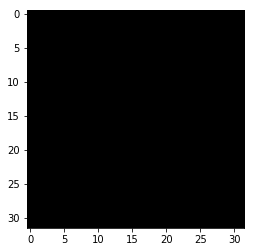

In [76]:
plt.imshow(delta)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


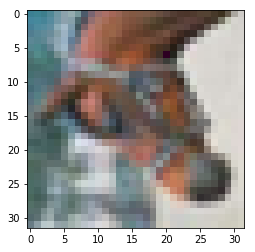

In [77]:
plt.imshow(attack)

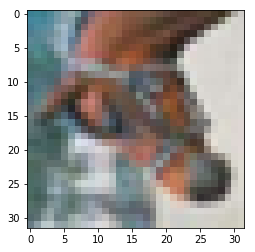

In [78]:
plt.imshow(horse)